# CRM Marketing Analytics - Exploratory/Statistical Analysis task

## Introduction

This notebook will accomplish the following task:

**Overall goal:**  
You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.  

**Section 01: Exploratory Data Analysis**  
* Are there any null values or outliers? How will you wrangle/handle them?
* Are there any variables that warrant transformations?
* Are there any useful variables that you can engineer with the given data?
* Do you notice any patterns or anomalies in the data? Can you plot them?

**Section 02: Statistical Analysis**  
Please run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings.  

* What factors are significantly related to the number of store purchases?
* Does US fare significantly better than the Rest of the World in terms of total purchases?
* Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
* Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
* Is there a significant relationship between geographical regional and success of a campaign?

**Section 03: Data Visualization**  
Please plot and visualize the answers to the below questions.  

* Which marketing campaign is most successful?
* What does the average customer look like for this company?
* Which products are performing best?
* Which channels are underperforming?

## Dataset

Before beginning the analysis, we will load and view the dataset, and perform some initial cleaning.

* View the dataset info:

In [1]:
# load libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import statsmodels.api as sm

pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

# load dataset
df = pd.read_csv('/Users/meetpatel/Documents/Stevens/Projects/CRM-Marketing Data Analysis/marketing_data.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0         0     6/16/14        0       189        104              379   
1         0     6/15/14        0       464          5               64   
2         1     5/13/14        0       134         11               59   
3         1     5/11/14        0        10          0                1   
4         0      4/8/14        0         6         16               24   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              111               189           218                  1   
1                7                 0            37                  1   
2               15                 2            30                  1   
3                0                 0             0                  1   
4               11                 0            34                  2   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                4                    4                  6                  1   
1                7                    3                  7                  5   
2                3                    2                  5                  2   
3                1                    0                  2                  7   
4                3                    1                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   Response  Complain Country  
0         1         0      SP  
1         1         0      CA  
2         0         0      US  
3         0         0     AUS  
4         1         0      SP

* Clean up column names
* Transform selected columns to numeric format:
    - `Income` to float

In [2]:
# clean up column names that contain whitespace
df.columns = df.columns.str.replace(' ', '')

# transform Income column to a numerical
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype('float')

* The cleaned dataset:

In [3]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     6/16/14        0       189        104              379              111   
1     6/15/14        0       464          5               64                7   
2     5/13/14        0       134         11               59               15   
3     5/11/14        0        10          0                1                0   
4      4/8/14        0         6         16               24               11   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0               189           218                  1                4   
1                 0            37                  1                7   
2                 2            30                  1                3   
3                 0             0                  1                1   
4                 0            34                  2                3   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    4                  6                  1             0   
1                    3                  7                  5             0   
2                    2                  5                  2             0   
3                    0                  2                  7             0   
4                    1                  2                  7             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  \
0             0             0             0             0         1         0   
1             0             0             0             1         1         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         1         0   

  Country  
0      SP  
1      CA  
2      US  
3     AUS  
4      SP

# Section 01: Exploratory Data Analysis

### Are there any null values or outliers? How will you wrangle/handle them?

#### Null Values
* Identify features containing null values:

In [4]:
# null values
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

* The feature `Income` contains 24 null values
* Plot this feature to identify best strategy for imputation
    - Findings: 
        - Most incomes are distributed between \\$0-\\$100,000, with a few outliers
        - Will impute null values with median value, to avoid effects of outliers on imputation value

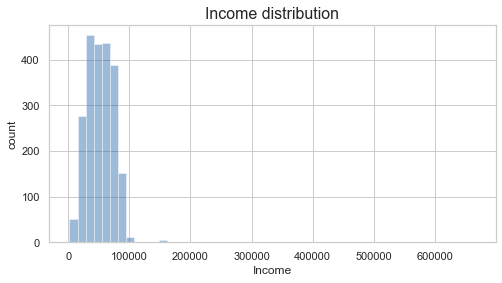

In [5]:
plt.figure(figsize=(8,4))
sns.distplot(df['Income'], kde=False, hist=True)
plt.title('Income distribution', size=16)
plt.ylabel('count');

<Axes: >

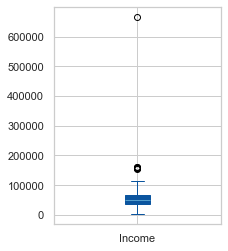

In [6]:
df['Income'].plot(kind='box', figsize=(3,4), patch_artist=True)

* Impute null values in `Income`, using median value (to avoid skewing of the mean due to outliers):

In [7]:
df['Income'] = df['Income'].fillna(df['Income'].median())

#### Outliers

* Identify features containing outliers:
    - Findings: Multiple features contain outliers (see boxplots below), but the only that likely indicate data entry errors are `Year_Birth <= 1900`

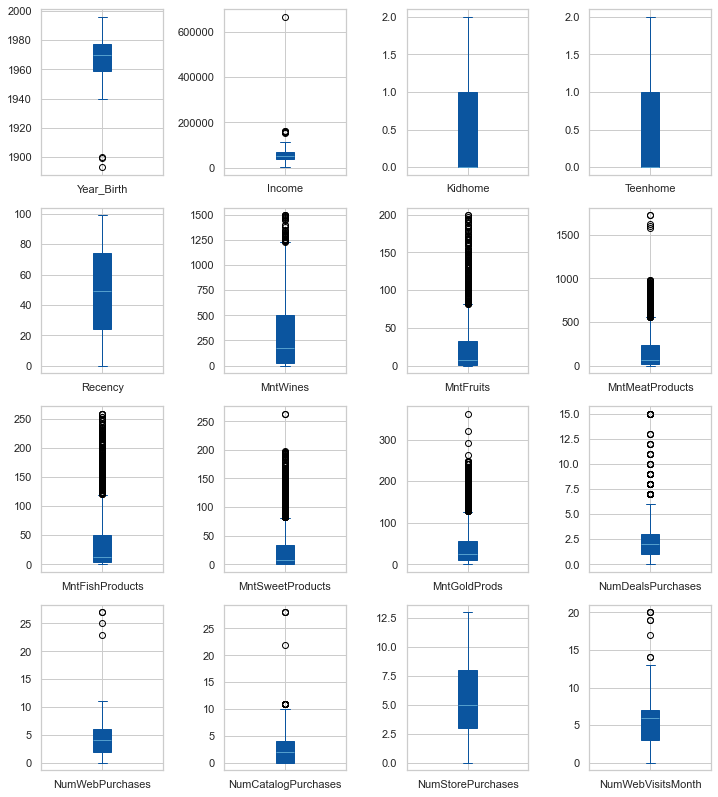

In [8]:
# select columns to plot
df_to_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

* Remove rows where `Year_Birth <= 1900`:

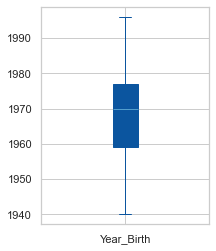

In [9]:
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

plt.figure(figsize=(3,4))
df['Year_Birth'].plot(kind='box', patch_artist=True);

## Are there any variables that warrant transformations?

* View data types:
    - Findings: The `Dt_Customer` column should be transformed to datetime format

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Year_Birth           2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2237 non-null   object 
 4   Income               2237 non-null   float64
 5   Kidhome              2237 non-null   int64  
 6   Teenhome             2237 non-null   int64  
 7   Dt_Customer          2237 non-null   object 
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  NumDealsPurchases    2237 non-null   i

* Transform `Dt_Customer` to datetime:

In [11]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

### Are there any useful variables that you can engineer with the given data?

* Review a list of the feature names below, from which we can engineer:
    - The total number of dependents in the home ('Dependents') can be engineered from the sum of 'Kidhome' and 'Teenhome'
    - The year of becoming a customer ('Year_Customer') can be engineered from 'Dt_Customer'
    - The total amount spent ('TotalMnt') can be engineered from the sum of all features containing the keyword 'Mnt'
    - The total purchases ('TotalPurchases') can be engineered from the sum of all features containing the keyword 'Purchases'
    - The total number of campains accepted ('TotalCampaignsAcc') can be engineered from the sum of all features containing the keywords 'Cmp' and 'Response' (the latest campaign)

In [12]:
list(df.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country']

* Perform feature engingeering as outlined in notes above:

In [13]:
# Dependents
df['Dependents'] = df['Kidhome'] + df['Teenhome']

# Year becoming a Customer
df['Year_Customer'] = df.Dt_Customer.dt.year

# Month becoming a Customer
df["Month_Customer"] = df.Dt_Customer.dt.month

# Total Amount Spent
mnt_cols = [col for col in df.columns if 'Mnt' in col]
df['TotalMnt'] = df[mnt_cols].sum(axis=1)

# Total Purchases
purchases_cols = [col for col in df.columns if 'Purchases' in col]
df['TotalPurchases'] = df[purchases_cols].sum(axis=1)

# Total Campaigns Accepted
campaigns_cols = [col for col in df.columns if 'Cmp' in col] + ['Response'] # 'Response' is for the latest campaign
df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis=1)

#Average Order Volume
df['AOV'] = df.TotalMnt/df.TotalPurchases

# view new features, by customer ID
df[['ID', 'Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc', 'AOV']].head()

ID  Dependents  Year_Customer  TotalMnt  TotalPurchases  \
0   1826           0           2014      1190              15   
1      1           0           2014       577              18   
2  10476           1           2014       251              11   
3   1386           2           2014        11               4   
4   5371           1           2014        91               8   

   TotalCampaignsAcc        AOV  
0                  1  79.333333  
1                  2  32.055556  
2                  0  22.818182  
3                  0   2.750000  
4                  2  11.375000

In [14]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2237.000000  2237.000000    2237.000000  2237.000000  2237.000000   
mean    5590.726419  1968.901654   52227.407689     0.444345     0.506482   
std     3245.118591    11.701917   25043.266830     0.538467     0.544593   
min        0.000000  1940.000000    1730.000000     0.000000     0.000000   
25%     2829.000000  1959.000000   35523.000000     0.000000     0.000000   
50%     5455.000000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.000000  1977.000000   68281.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2237.000000  2237.000000  2237.000000      2237.000000   
mean     49.104604   303.995530    26.270451       166.916853   
std      28.956073   336.574382    39.715972       225.661158   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     1.000000        16.000000   
50%      49.000000   174.000000     8.000000        67.000000   
75%      74.000000   504.000000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2237.000000       2237.000000   2237.000000        2237.000000   
mean         37.523022         27.068842     43.968708           2.326777   
std          54.639909         41.293949     52.054318           1.932923   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2237.000000          2237.000000        2237.000000   
mean          4.087170             2.662494           5.794367   
std           2.779461             2.923456           3.250940   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2237.000000   2237.000000   2237.000000   2237.000000   
mean            5.319177      0.072865      0.074654      0.072418   
std             2.426386      0.259974      0.262890      0.259237   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Response     Complain   Dependents  \
count   2237.000000   2237.000000  2237.000000  2237.000000  2237.000000   
mean       0.064372      0.013411     0.149307     0.008941     0.950827   
std        0.245469      0.115052     0.356471     0.094152     0.752037   
min        0.000000      0.000000     0.000000     0.000000     0.000000   
25%        0.000000      0.000000     0.000000     0.000000     0.000000   
50%        0.000000      0.000000     0.000000     0.000000     1.000000   
75%        0.000000      0.000000     0.000000     0.000000     1.000000   
max        1.000000      1.000000     1.000000     1.000000     3.000000   

       Year_Customer  Month_Customer     TotalMnt  TotalPurchases  \
count    2237.000000     2237.000000  2237.000000     2237.0000

In [16]:
df[df['TotalPurchases']==0]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
456    3955        1965  Graduation       Divorced    4861.0        0   
1289  11110        1973  Graduation         Single    3502.0        1   
1824   5555        1975  Graduation       Divorced  153924.0        0   
1923  11181        1949         PhD        Married  156924.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
456          0  2014-06-22       20         2          1                1   
1289         0  2013-04-13       56         2          1                1   
1824         0  2014-02-07       81         1          1                1   
1923         0  2013-08-29       85         2          1                2   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
456                 1                 0             1                  0   
1289                0                 0             1                  0   
1824                1                 1             1                  0   
1923                1                 1             1                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
456                 0                    0                  0   
1289                0                    0                  0   
1824                0                    0                  0   
1923                0                    0                  0   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
456                  14             0             0             0   
1289                 14             0             0             0   
1824                  0             0             0             0   
1923                  0             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Response  Complain Country  Dependents  \
456              0             0         0         0      SA           0   
1289             0             0         0         0     IND           1   
1824             0             0         0         0      SP           0   
1923             0             0         0         0      CA           0   

      Year_Customer  Month_Customer  TotalMnt  TotalPurchases  \
456            2014               6         6               0   
1289           2013               4         5               0   
1824           2014               2         6               0   
1923           2013               8         8               0   

      TotalCampaignsAcc  AOV  
456                   0  inf  
1289                  0  inf  
1824                  0  inf  
1923                  0  inf

In [18]:
df.replace([np.inf, -np.inf], 0, inplace=True)

In [19]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2237.000000  2237.000000    2237.000000  2237.000000  2237.000000   
mean    5590.726419  1968.901654   52227.407689     0.444345     0.506482   
std     3245.118591    11.701917   25043.266830     0.538467     0.544593   
min        0.000000  1940.000000    1730.000000     0.000000     0.000000   
25%     2829.000000  1959.000000   35523.000000     0.000000     0.000000   
50%     5455.000000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.000000  1977.000000   68281.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2237.000000  2237.000000  2237.000000      2237.000000   
mean     49.104604   303.995530    26.270451       166.916853   
std      28.956073   336.574382    39.715972       225.661158   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     1.000000        16.000000   
50%      49.000000   174.000000     8.000000        67.000000   
75%      74.000000   504.000000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2237.000000       2237.000000   2237.000000        2237.000000   
mean         37.523022         27.068842     43.968708           2.326777   
std          54.639909         41.293949     52.054318           1.932923   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2237.000000          2237.000000        2237.000000   
mean          4.087170             2.662494           5.794367   
std           2.779461             2.923456           3.250940   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2237.000000   2237.000000   2237.000000   2237.000000   
mean            5.319177      0.072865      0.074654      0.072418   
std             2.426386      0.259974      0.262890      0.259237   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Response     Complain   Dependents  \
count   2237.000000   2237.000000  2237.000000  2237.000000  2237.000000   
mean       0.064372      0.013411     0.149307     0.008941     0.950827   
std        0.245469      0.115052     0.356471     0.094152     0.752037   
min        0.000000      0.000000     0.000000     0.000000     0.000000   
25%        0.000000      0.000000     0.000000     0.000000     0.000000   
50%        0.000000      0.000000     0.000000     0.000000     1.000000   
75%        0.000000      0.000000     0.000000     0.000000     1.000000   
max        1.000000      1.000000     1.000000     1.000000     3.000000   

       Year_Customer  Month_Customer     TotalMnt  TotalPurchases  \
count    2237.000000     2237.000000  2237.000000     2237.0000

### Do you notice any patterns or anomalies in the data? Can you plot them?

* To identify patterns, we will first identify feature correlations. Positive correlations between features appear red, negative correlations appear blue, and no correlation appears grey in the clustered heatmap below.
* From this heatmap we can observe the following clusters of correlated features:
    - The **"High Income"** cluster:
        - Amount spent ('TotalMnt' and other 'Mnt' features) and number of purchases ('TotalPurchases' and other 'Num...Purchases' features) are positively correlated with 'Income'
        - Purchasing in store, on the web, or via the catalog ('NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases') is positively correlated with 'Income'
    - The **"Have Kids & Teens"** cluster:
        - Amount spent ('TotalMnt' and other 'Mnt' features) and number of purchases ('TotalPurchases' and other 'Num...Purchases' features) are negatively correlated with 'Dependents' (with a stronger effect from kids *vs.* teens)
        - Purchasing deals ('NumDealsPurchases') is positively correlated with 'Dependents' (kids and/or teens) and negatively correlated with 'Income'
    - The **"Advertising Campaigns"** cluster:
        - Acceptance of the advertising campaigns ('AcceptedCmp' and 'Response') are strongly positively correlated with each other
        - Weak positive correlation of the advertising campaigns is seen with the "High Income" cluster, and weak negative correlation is seen with the "Have Kids & Teens" cluster
* Anomalies:
    - Surprisingly, the number of website visits in the last month ('NumWebVisitsMonth') does not correlate with an increased number of web purchases ('NumWebPurchases')
    - Instead, 'NumWebVisitsMonth' is positively correlated with the number of deals purchased ('NumDealsPurchases'), suggesting that  suggesting that deals are an effective way of stimulating purchases on the website
    - Intuitively, I'd think the more complaints a customer has, the less he/she may spend on our store, but the number of complain in the last two years has almost no correlation with the total amount spent in the last two years
    - After further investigating the data, I found that it is because we only have 20 customers who complained in the last two years, but we have 2200 customers in total. The customer service in the company has done a wonderful job in the last two years.

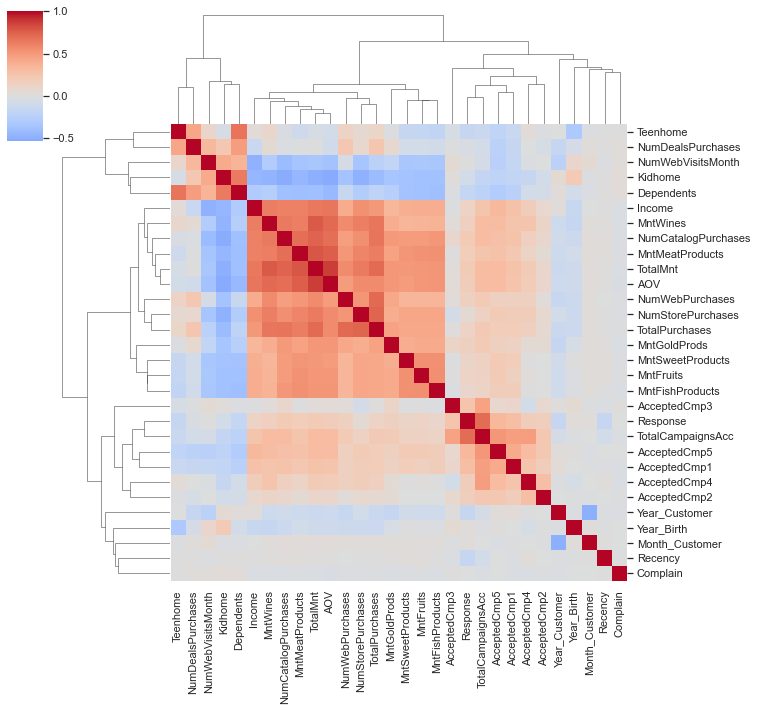

In [20]:
# calculate correlation matrix
## using non-parametric test of correlation (kendall), since some features are binary
corrs = df.drop(columns='ID').select_dtypes(include=np.number).corr(method = 'kendall')

# plot clustered heatmap of correlations
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

* Plot illustrating the effect of high income on spending:

Note: For the purposes of this plot, limiting income to < 200000 to remove outlier

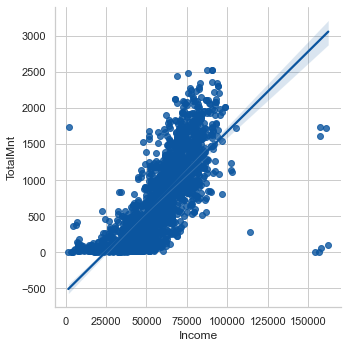

In [21]:
sns.lmplot(x='Income', y='TotalMnt', data=df[df['Income'] < 200000]);

* Plot illustrating negative effect of having dependents (kids & teens) on spending:

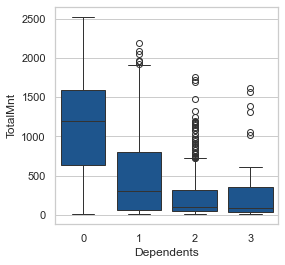

In [22]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='TotalMnt', data=df);

* Plot illustrating positive effect of having dependents (kids & teens) on number of deals purchased:

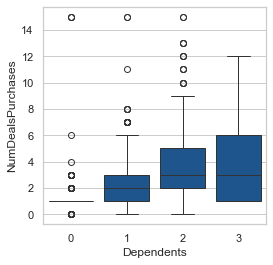

In [23]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='NumDealsPurchases', data=df);

* Plots illustrating the positive effect of income and negative effect of having kids & teens on advertising campaign acceptance:

Note: For the purposes of the following plot, limiting income to < 200000 to remove outlier

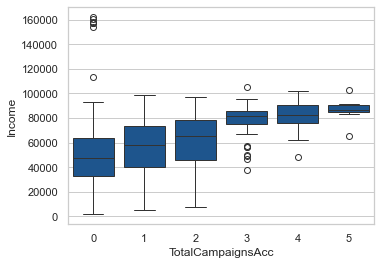

In [24]:
plt.figure(figsize=(5.5,4))
sns.boxplot(x='TotalCampaignsAcc', y='Income', data=df[df['Income']<200000]);

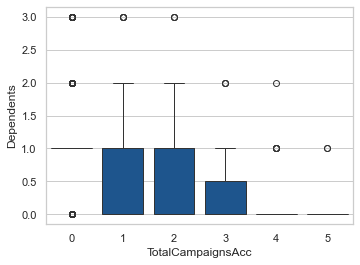

In [25]:
plt.figure(figsize=(5.5,4))
sns.boxplot(x='TotalCampaignsAcc', y='Dependents', data=df);

* Investigate anomaly: 
    - Number of web visits in the last month is not positively correlated with number of web purchases
    - Instead, it is positively correlated with the number of deals purchased, suggesting that deals are an effective way of stimulating purchases on the website

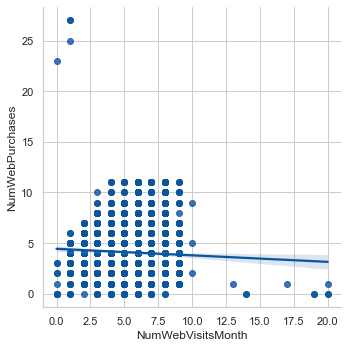

In [26]:
sns.lmplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df);

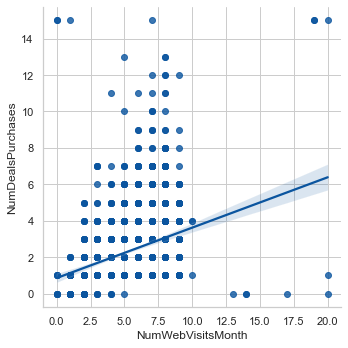

In [27]:
sns.lmplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=df);

In [28]:
df[df['Complain'] == 1]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
206   10995        1988    2n Cycle        Married  15716.0        1   
297   10401        1976    2n Cycle       Together  26326.0        0   
355    5726        1983      Master         Single  31788.0        1   
554    9483        1959  Graduation       Together  57957.0        0   
661   10971        1977  Graduation         Single  37774.0        2   
727     255        1951  Graduation       Divorced  22263.0        1   
774     359        1950  Graduation       Together  48070.0        0   
941    3710        1984         PhD         Single  39684.0        1   
998    6201        1978  Graduation         Single  38643.0        1   
1085   7966        1959  Graduation         Single  80982.0        1   
1101   3120        1981  Graduation       Together  38547.0        1   
1296   4427        1995    2n Cycle         Single  83257.0        0   
1334   7192        1955  Graduation       Together  65748.0        0   
1473   6142        1943      Master        Married  65073.0        0   
1504   9500        1959  Graduation        Married  58113.0        0   
1742  10637        1964  Graduation        Married  40800.0        1   
1864   6742        1979  Graduation        Married  17688.0        1   
2079   6730        1954  Graduation        Married  38998.0        1   
2080   9916        1954  Graduation        Married  38998.0        1   
2089   2875        1978  Graduation        Married  67023.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
206          0  2012-11-12        8        16          5               30   
297          0  2013-09-04       12         1          0                5   
355          0  2014-03-20       15        16          7               23   
554          1  2013-08-19       24       290         59              177   
661          0  2012-09-03       28       173          8              107   
727          1  2014-03-30       31        17          0                2   
774          1  2013-01-13       33       373         14               83   
941          0  2012-10-12       41        19          0               35   
998          1  2013-11-29       45        22          2               14   
1085         1  2013-01-08       48       505        137              401   
1101         0  2013-08-28       49         6          1               10   
1296         0  2012-09-18       56       536         27              590   
1334         1  2013-04-15       58       172         73               93   
1473         0  2013-08-20       65       629         17              177   
1504         1  2013-01-25       66       221        104              169   
1742         2  2013-01-01       77        24          0               27   
1864         0  2013-01-13       82         2          2                1   
2079         1  2012-11-03       92        34          1               14   
2080         1  2012-11-03       92        34          1               14   
2089         0  2014-03-04       93       444         44              382   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
206                 8                 7            26                  3   
297                 0                 3             9                  1   
355                 0                 8             6                  3   
554                77                 5            29                  7   
661                 7                 2           176                  4   
727                 0                 0             2                  2   
774                 6                 9            19                  3   
941                 6                 4            17                  2   
998                 0                 1            10                  2   
1085              104                22            22                  3   
1101                0                 1   

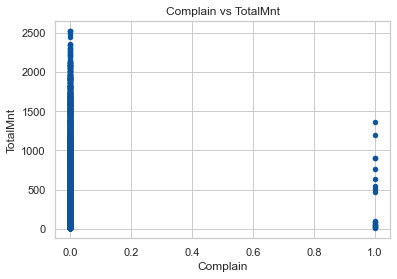

In [29]:
df.plot(x='Complain', y='TotalMnt', kind='scatter')
plt.title("Complain vs TotalMnt");

# Section 02: Statistical Analysis

Please run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings.  

### What factors are significantly related to the number of store purchases?  

* We will use use a linear regression model with `NumStorePurchases` as the target variable, and then use machine learning explainability techniques to get insights about which features predict the number of store purchases
* Begin by plotting the target variable:

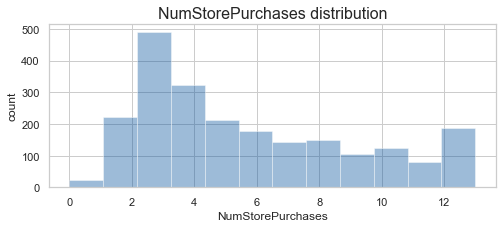

In [30]:
plt.figure(figsize=(8,3))
sns.distplot(df['NumStorePurchases'], kde=False, hist=True, bins=12)
plt.title('NumStorePurchases distribution', size=16)
plt.ylabel('count');

* Drop uninformative features
    - `ID` is unique to each customer
    - `Dt_Customer` will be dropped in favor of using engineered variable `Year_Customer`
* Perform one-hot encoding of categorical features, encoded data shown below:

* Fit linear regression model to training data (70% of dataset)
* Evaluate predictions on test data (30% of dataset) using RMSE:
    - Findings: The RMSE is exceedingly small compared to the median value of the target variable, indicating good model predictions

In [31]:
df.drop(columns=['ID', 'Dt_Customer'], inplace=True)

In [32]:
# one-hot encoding of categorical features
from sklearn.preprocessing import OneHotEncoder

# get categorical features and review number of unique values
cat = df.select_dtypes(exclude=np.number)
print("Number of unique values per categorical feature:\n", cat.nunique())

# use one hot encoder
enc = OneHotEncoder(sparse=False).fit(cat)
cat_encoded = pd.DataFrame(enc.transform(cat))
cat_encoded.columns = enc.get_feature_names(cat.columns)

# merge with numeric data
num = df.drop(columns=cat.columns)
df2 = pd.concat([cat_encoded, num], axis=1)
df2.head()

Number of unique values per categorical feature:
 Education         5
Marital_Status    8
Country           8
dtype: int64


Education_2n Cycle  Education_Basic  Education_Graduation  \
0                 0.0              0.0                   1.0   
1                 0.0              0.0                   1.0   
2                 0.0              0.0                   1.0   
3                 0.0              0.0                   1.0   
4                 0.0              0.0                   1.0   

   Education_Master  Education_PhD  Marital_Status_Absurd  \
0               0.0            0.0                    0.0   
1               0.0            0.0                    0.0   
2               0.0            0.0                    0.0   
3               0.0            0.0                    0.0   
4               0.0            0.0                    0.0   

   Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  \
0                   0.0                      1.0                     0.0   
1                   0.0                      0.0                     0.0   
2                   0.0                      0.0                     1.0   
3                   0.0                      0.0                     0.0   
4                   0.0                      0.0                     0.0   

   Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
0                    0.0                      0.0                   0.0   
1                    1.0                      0.0                   0.0   
2                    0.0                      0.0                   0.0   
3                    0.0                      1.0                   0.0   
4                    1.0                      0.0                   0.0   

   Marital_Status_YOLO  Country_AUS  Country_CA  Country_GER  Country_IND  \
0                  0.0          0.0         0.0          0.0          0.0   
1                  0.0          0.0         1.0          0.0          0.0   
2                  0.0          0.0         0.0          0.0          0.0   
3                  0.0          1.0         0.0          0.0          0.0   
4                  0.0          0.0         0.0          0.0          0.0   

   Country_ME  Country_SA  Country_SP  Country_US  Year_Birth   Income  \
0         0.0         0.0         1.0         0.0        1970  84835.0   
1         0.0         0.0         0.0         0.0        1961  57091.0   
2         0.0         0.0         0.0         1.0        1958  67267.0   
3         0.0         0.0         0.0         0.0        1967  32474.0   
4         0.0         0.0         1.0         0.0        1989  21474.0   

   Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0        0         0        0       189        104              379   
1        0         0        0       464          5               64   
2        0         1        0       134         11               59   
3        1         1        0        10          0                1   
4        1         0        0         6         16               24   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              111               189           218                  1   
1                7                 0            37                  1   
2               15                 2            30                  1   
3                0                 0             0                  1   
4               11                 0            34                  2   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                4                    4                  6                  1   
1                7                    3                  7                  5   
2                3                    2                  5                  2   
3                1                    0                  2                  7   
4                3                    1                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0      

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# isolate X and y variables, and perform train-test split
X = df2.drop(columns='NumStorePurchases')
y = df2['NumStorePurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

# evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  3.2822274498122476e-14
Median value of target variable:  5.0


* Identify features that significantly affect the number of store purchases, using permutation importance:
    - Significant features:
        - 'TotalPurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases'
        - All other features are not significant

In [35]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=5)

* Explore the directionality of these effects, using SHAP values:
    - Findings:
        - The number of store purchases increases with higher number of total purchases ('TotalPurchases')
        - The number of store purchases decreases with higher number of catalog, web, or deals purchases ('NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases')
    - Interpretation:
        - Customers who shop the most in stores are those who shop less via the catalog, website, or special deals

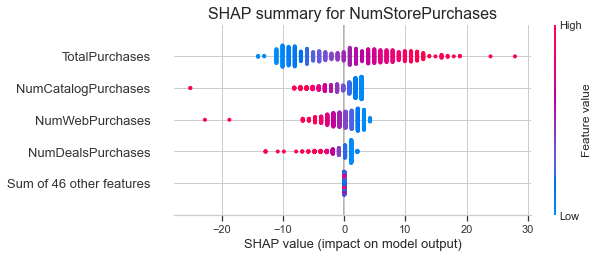

In [38]:
import shap

# calculate shap values 
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

# plot
plt.title('SHAP summary for NumStorePurchases', size=16)
shap.plots.beeswarm(shap_values, max_display=5);

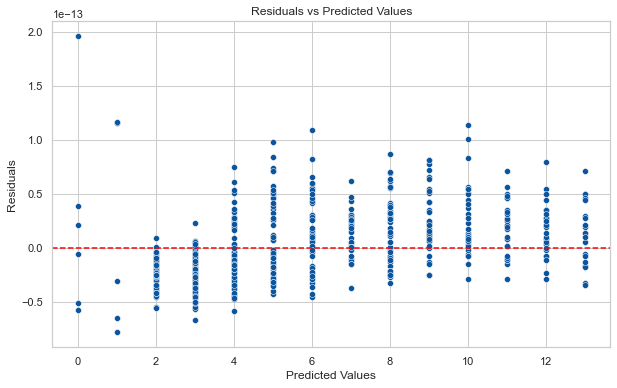

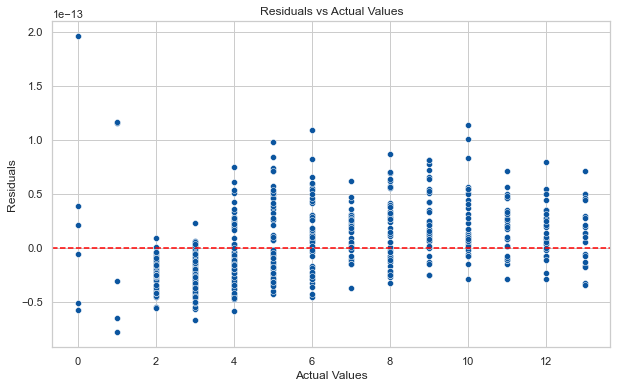

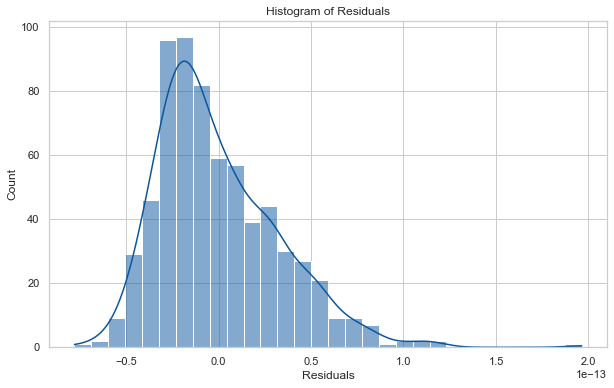

In [39]:
residuals = y_test - preds

# Plotting residuals vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=preds, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Alternatively, plot residuals vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Values')
plt.show()

# You can also create a histogram of residuals to check their distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

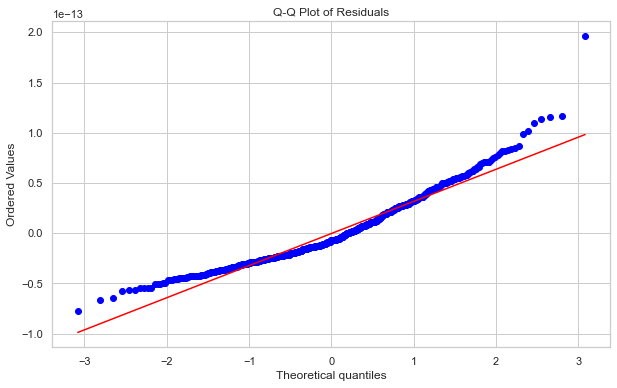

In [40]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


Text(0, 0.5, 'Average Order Volume')

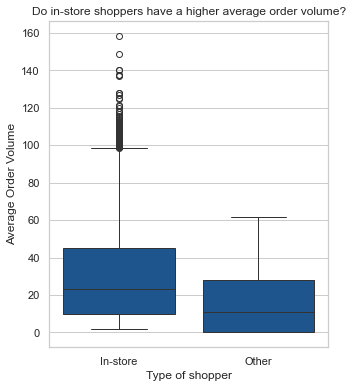

In [50]:
store_shoppers = df[df.NumStorePurchases > 0]
store_shoppers = store_shoppers[store_shoppers.AOV <= (store_shoppers.AOV.mean()+3*store_shoppers.AOV.std())]
store_shoppers['Type of shopper'] = "In-store"
other_shoppers = df[df.NumStorePurchases==0]
other_shoppers['Type of shopper'] = "Other"

plt.figure(figsize = (5, 6))
all_shoppers = store_shoppers.append(other_shoppers)
plt.title("Do in-store shoppers have a higher average order volume?")
sns.boxplot(data = all_shoppers, x = 'Type of shopper', y = 'AOV')
plt.ylabel("Average Order Volume")

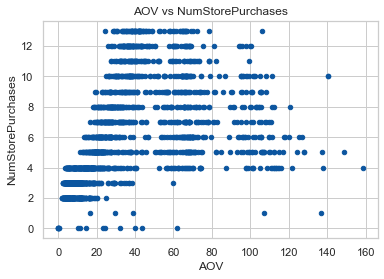

In [46]:
all_shoppers.plot(x='AOV', y='NumStorePurchases', kind='scatter')
plt.title("AOV vs NumStorePurchases");

In [47]:
from scipy.stats import pearsonr
all_shoppers.replace([np.inf, -np.inf], 0, inplace=True)
r, p_value  =  pearsonr(x=all_shoppers['AOV'], y=all_shoppers['NumStorePurchases'])

# print results
print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  0.5226315115768922
Pearson p-value:  7.68116123507574e-157


### Does US fare significantly better than the Rest of the World in terms of total purchases?

* Plot total number of purchases by country:
    - Findings: 
        - Spain (SP) has the highest number of purchases
        - US is second to last, therefore the US does not fare better than the rest of the world in terms of the total number of purchases

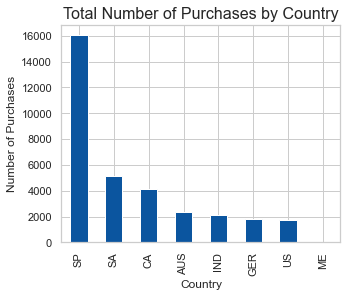

In [48]:
plt.figure(figsize=(5,4))
df.groupby('Country')['TotalPurchases'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Number of Purchases by Country', size=16)
plt.ylabel('Number of Purchases');

* Plot total amount spent by country: 
    - Findings: 
        - Spain (SP) has the highest total amount spent on purchases
        - US is second to last, therefore the US does not fare better than the rest of the world in terms of the total amount spent on purchases

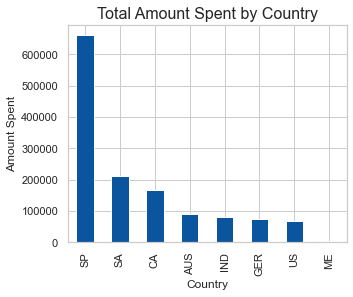

In [49]:
plt.figure(figsize=(5,4))
df.groupby('Country')['TotalMnt'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Amount Spent by Country', size=16)
plt.ylabel('Amount Spent');

### Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test

* Plot relationship between amount spent on gold in the last 2 years (`MntGoldProds`) and number of in store purchases (`NumStorePurchases`):
    - Findings: There is a positive relationship, but is it statistically significant?

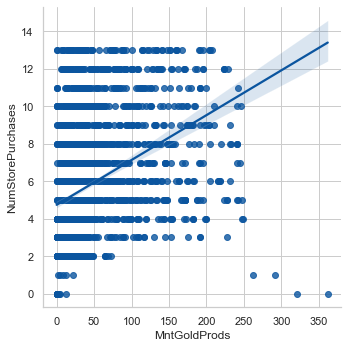

In [51]:
sns.lmplot(x='MntGoldProds', y='NumStorePurchases', data = df);

* Perform Kendall correlation analysis (non-parametric test since `MntGoldProducts` is not normally distributed and contains outliers):
    - Findings: There is significant positive correlation between `MntGoldProds` and `NumStorePurchases`

In [52]:
from scipy.stats import kendalltau

kendall_corr = kendalltau(x=df['MntGoldProds'], y=df['NumStorePurchases'])

# print results
print('Kendall correlation (tau): ', kendall_corr.correlation)
print('Kendall p-value: ', kendall_corr.pvalue)

Kendall correlation (tau):  0.3927160395725131
Kendall p-value:  3.55881817905435e-152


### Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? 

* We will compare `MntFishProducts` between Married PhD candidates and all other customers:
    - Findings: Married PhD candidates spend significantly less on fish products compared to other customers.

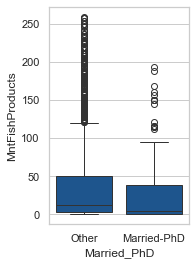

In [53]:
# sum the marital status and phd dummy variables - the Married+PhD group will have value of 2
df2['Married_PhD'] = df2['Marital_Status_Married'] + df2['Education_PhD']
df2['Married_PhD'] = df2['Married_PhD'].replace({2:'Married-PhD', 1:'Other', 0:'Other'})

# plot MntFishProducts between Married-PhD and others
plt.figure(figsize=(2.5,4))
sns.boxplot(x='Married_PhD', y='MntFishProducts', data=df2);

In [54]:
# independent t-test p-value
from scipy.stats import ttest_ind
pval = ttest_ind(df2[df2['Married_PhD'] == 'Married-PhD']['MntFishProducts'], df2[df2['Married_PhD'] == 'Other']['MntFishProducts']).pvalue
print("t-test p-value: ", round(pval, 3))

t-test p-value:  0.005


In [55]:
# now drop the married-phD column created above, to include only the original variables in the analysis below
df2.drop(columns='Married_PhD', inplace=True)

### What other factors are significantly related to amount spent on fish?

* Like with the analysis of `NumStorePurchases` above, we will use use a linear regression model with `MntFishProducts` as the target variable, and then use machine learning explainability techniques to get insights about which features predict the amount spent on fish
* Begin by plotting the target variable:

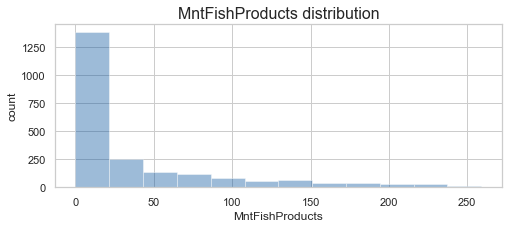

In [56]:
plt.figure(figsize=(8,3))
sns.distplot(df['MntFishProducts'], kde=False, hist=True, bins=12)
plt.title('MntFishProducts distribution', size=16)
plt.ylabel('count');

* Fit linear regression model to training data (70% of dataset)
* Evaluate predictions on test data (30% of dataset) using RMSE:
    - Findings: The RMSE is exceedingly small compared to the median value of the target variable, indicating good model predictions

In [57]:
# isolate X and y variables, and perform train-test split
X = df2.drop(columns='MntFishProducts')
y = df2['MntFishProducts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

# evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  6.298759646354316e-13
Median value of target variable:  12.0


* Identify features that significantly affect the amount spent on fish, using permutation importance:
    - Significant features:
        - 'TotalMnt', 'MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntSweetProducts', 'MntFruits'
        - All other features are not significant

In [58]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=7)

* Explore the directionality of these effects, using SHAP values:
    - Findings:
        - The amount spent on fish increases with higher total amount spent ('TotalMnt')
        - The amount spent on fish decreases with higher amounts spent on wine, meat, gold, fruit, or sweets ('MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntSweetProducts', 'MntFruits')
    - Interpretation:
        - Customers who spend the most on fish are those who spend less on other products (wine, meat, gold, fruit, and sweets)

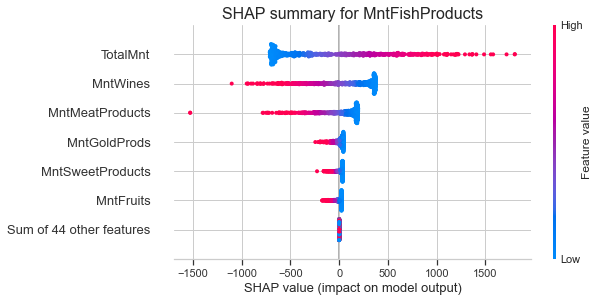

In [59]:
import shap

# calculate shap values 
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

# plot
plt.title('SHAP summary for MntFishProducts', size=16)
shap.plots.beeswarm(shap_values, max_display=7);

### Is there a significant relationship between geographical regional and success of a campaign?

* Plot success of campaigns by region:
    - Findings:
        - The campaign acceptance rates are low overall
        - The campaign with the highest overall acceptance rate is the most recent campaign (column name: `Response`)
        - The country with the highest acceptance rate in any campaign is Mexico
    - Is the effect of region on campaign success statistically significant? See below.

In [60]:
# convert country codes to correct nomenclature for choropleth plot
# the dataset doesn't provide information about country codes
## ...so I'm taking my best guess about the largest nations that make sense given the codes provided
df['Country_code'] = df['Country'].replace({'SP': 'ESP', 'CA': 'CAN', 'US': 'USA', 'SA': 'ZAF', 'ME': 'MEX'})

# success of campaigns by country code
df_cam = df[['Country_code', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].melt(
    id_vars='Country_code', var_name='Campaign', value_name='Accepted (%)')
df_cam = pd.DataFrame(df_cam.groupby(['Country_code', 'Campaign'])['Accepted (%)'].mean()*100).reset_index(drop=False)

# rename the campaign variables so they're easier to interpret
df_cam['Campaign'] = df_cam['Campaign'].replace({'AcceptedCmp1': '1',
                                                'AcceptedCmp2': '2',
                                                'AcceptedCmp3': '3',
                                                'AcceptedCmp4': '4',
                                                'AcceptedCmp5': '5',
                                                 'Response': 'Most recent'
                                                })

# choropleth plot
import plotly.express as px

fig = px.choropleth(df_cam, locationmode='ISO-3', color='Accepted (%)', facet_col='Campaign', facet_col_wrap=2,
                    facet_row_spacing=0.05, facet_col_spacing=0.01, width=700,
                    locations='Country_code', projection='natural earth', title='Advertising Campaign Success Rate by Country'
                   )
fig.show()

* Statistical summary of regional effects on campaign success:
    - Methodology: Performed logistic regression for Campaign Accepted by Country, reporting Chisq p-value for overall model.
    - Findings: The regional differences in advertising campaign success are statistically significant.

In [61]:
# calculate logistic regression p-values for campaign acceptance ~ country using generalized linear model
import statsmodels.formula.api as smf
import statsmodels as sm
from scipy import stats

## get the data of interest for glm
df_cam_wide = df[['Country', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

## to store statistics results
stat_results = []

## perform glm
for col in df_cam_wide.drop(columns='Country').columns:
    this_data = df_cam_wide[['Country', col]]
    
    # define formula
    formula = col+'~Country'
    
    # logistic regression (family=binomial)
    model = smf.glm(formula = formula, data=this_data, family=sm.genmod.families.Binomial())
    result = model.fit()
    
    # get chisquare value for overall model (CampaignAccepted ~ Country) and calculate p-value
    chisq = result.pearson_chi2
    pval = stats.distributions.chi2.sf(chisq , 7) # Df Model = 7 degrees of freedom when you run result.summary()
     
    # append to stat_results
    stat_results.append(pval)
    
    # print stat summary for entire model
    print(result.summary())
    
## check results
print("\nChisq p-values: ", stat_results)

                 Generalized Linear Model Regression Results                  
Dep. Variable:           AcceptedCmp1   No. Observations:                 2237
Model:                            GLM   Df Residuals:                     2229
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -532.52
Date:                Tue, 13 Aug 2024   Deviance:                       1065.0
Time:                        14:14:36   Pearson chi2:                 2.23e+03
No. Iterations:                    20   Pseudo R-squ. (CS):           0.001563
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.0845      0.387     -7.

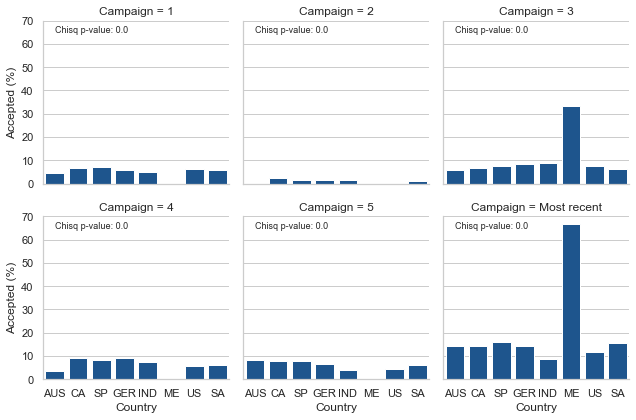

In [62]:
# plotting
## merge in the original country codes provided in the dataset
countries = df[['Country', 'Country_code']].drop_duplicates().reset_index(drop=True)
df_cam2 = df_cam.merge(countries, how='left', on='Country_code')
df_cam2.head()

## bar graphs
g = sns.FacetGrid(df_cam2, col='Campaign', col_wrap=3)
g.map(sns.barplot, 'Country', 'Accepted (%)')
for ax, pval in zip(g.axes.flat, stat_results):
    ax.text(0, 65, "Chisq p-value: "+str(pval), fontsize=9) #add text;

# Section 03: Data Visualization

Please plot and visualize the answers to the below questions.

### Which marketing campaign is most successful?

* Plot marketing campaign overall acceptance rates:
    - Findings: The most successful campaign is the most recent (column name: `Response`)

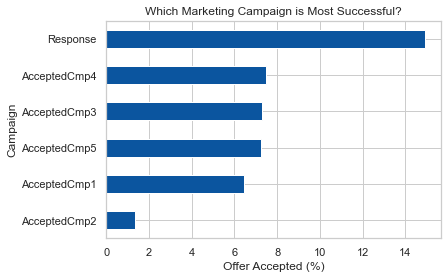

In [67]:
# Calculate the total number of observations
total_observations = len(df)

# Calculate the sum of accepted offers for each campaign
campaign_sums = df[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]].sum()

# Convert the sums to percentages
campaign_percentages = (campaign_sums / total_observations) * 100

# Sort the percentages
campaign_percentages_sorted = campaign_percentages.sort_values()

# Plot the percentages as a horizontal bar chart
campaign_percentages_sorted.plot.barh()

# Add titles and labels
plt.title("Which Marketing Campaign is Most Successful?")
plt.xlabel("Offer Accepted (%)")
plt.ylabel("Campaign")

# Show the plot
plt.show()


### What does the average customer look like for this company?

* Basic demographics: The average customer is...
    - Born in 1969
    - Became a customer in 2013
    - Has an income of roughly \$52,000 per year
    - Has 1 dependent (roughly equally split between kids or teens)
    - Made a purchase from our company in the last 49 days

In [68]:
# list of cols with binary responses
binary_cols = [col for col in df.columns if 'Accepted' in col] + ['Response', 'Complain']

# list of cols for spending 
mnt_cols = [col for col in df.columns if 'Mnt' in col]

# list of cols for channels
channel_cols = [col for col in df.columns if 'Num' in col] + ['TotalPurchases', 'TotalCampaignsAcc']

In [69]:
# average customer demographics
demographics = pd.DataFrame(round(df.drop(columns=binary_cols+mnt_cols+channel_cols).mean(), 1), columns=['Average']).reindex([
    'Year_Birth', 'Year_Customer', 'Income', 'Dependents', 'Kidhome', 'Teenhome', 'Recency'])

demographics

Average
Year_Birth      1968.9
Year_Customer   2013.0
Income         52227.4
Dependents         1.0
Kidhome            0.4
Teenhome           0.5
Recency           49.1

### Which products are performing best?

* The average customer spent...
    - \$25-50 on Fruits, Sweets, Fish, or Gold products
    - Over \$160 on Meat products
    - Over \$300 on Wines
    - Over \$600 total
* Products performing best:
    - Wines
    - Followed by meats

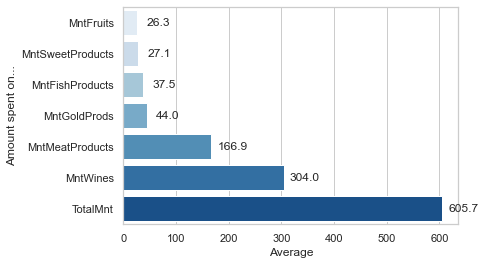

In [70]:
spending = pd.DataFrame(round(df[mnt_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=spending, palette='Blues')
plt.ylabel('Amount spent on...')

## add text labels for each bar's value
for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q+40,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

### Which channels are underperforming?

* Channels: The average customer...
    - Accepted less than 1 advertising campaign
    - Made 2 deals purchases, 2 catalog purchases, 4 web purchases, and 5 store purchases
    - Averaged 14 total purchases
    - Visited the website 5 times
* Underperforming channels:
    - Advertising campaigns
    - Followed by deals, and catalog

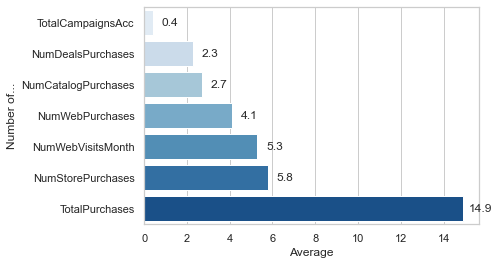

In [71]:
channels = pd.DataFrame(round(df[channel_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=channels, palette='Blues')
plt.ylabel('Number of...')

## add text labels for each bar's value
for p,q in zip(ax.patches, channels['Average']):
    ax.text(x=q+0.8,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;

# Findings so far


**Recall the overall goal:**  
You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions...

**Summary of actionable findings to improve advertising campaign success:**  
* The most successful advertising campaign was the most recent campaign (column name: `Response`), and was particularly successful in Mexico (>60% acceptance rate!)
    - Suggested action: Conduct future advertising campaigns using the same model recently implemented in Mexico. 
* Advertising campaign acceptance is positively correlated with income and negatively correlated with having kids/teens
    - Suggested action: Create two streams of targeted advertising campaigns, one aimed at high-income individuals without kids/teens and another aimed at lower-income individuals with kids/teens
* The most successful products are wines and meats (*i.e.* the average customer spent the most on these items)
    - Suggested action: Focus advertising campaigns on boosting sales of the less popular items
* The underperforming channels are deals and catalog purchases (*i.e.* the average customer made the fewest purchases via these channels)
* The best performing channels are web and store purchases (*i.e.* the average customer made the most purchases via these channels)
    - Suggested action: Focus advertising campaigns on the more successful channels, to reach more customers

# Further Investigation

Now that we know the last campaign is the most successful one, we can further investigate the differences in the customer characteristics and purchases behaviors(listed below) between the most succesful campaign, the last one, and the rest of the campaigns, the campaign 1-5.

- Characteristics: 'Year_Birth', 'Income', 'Minorhome', 'Country', 'Join_month', 'Join_weekday'
- Purchase behaviors: 
    - Products: 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts'
    - Channel: 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
    - Total: 'Total_Mnt', 'Total_num_purchase', 'AOV'

In [76]:
cp_last_n = df[(df.Response > 0) & (df.AcceptedCmp1 == 0) & (df.AcceptedCmp2 == 0) & (df.AcceptedCmp3 == 0) & (df.AcceptedCmp4 == 0) & (df.AcceptedCmp5 == 0)]

In [119]:
cp_1_n = df[(df.Response == 0) & (df.AcceptedCmp1 > 0) & (df.AcceptedCmp2 == 0) & (df.AcceptedCmp3 == 0) & (df.AcceptedCmp4 == 0) & (df.AcceptedCmp5 == 0)]

In [120]:
cp_2_n = df[(df.Response == 0) & (df.AcceptedCmp1 == 0) & (df.AcceptedCmp2 > 0) & (df.AcceptedCmp3 == 0) & (df.AcceptedCmp4 == 0) & (df.AcceptedCmp5 == 0)]

In [121]:
cp_3_n = df[(df.Response == 0) & (df.AcceptedCmp1 == 0) & (df.AcceptedCmp2 == 0) & (df.AcceptedCmp3 > 0) & (df.AcceptedCmp4 == 0) & (df.AcceptedCmp5 == 0)]

In [122]:
cp_4_n = df[(df.Response == 0) & (df.AcceptedCmp1 == 0) & (df.AcceptedCmp2 == 0) & (df.AcceptedCmp3 == 0) & (df.AcceptedCmp4 > 0) & (df.AcceptedCmp5 == 0)]

In [123]:
cp_5_n = df[(df.Response == 0) & (df.AcceptedCmp1 == 0) & (df.AcceptedCmp2 == 0) & (df.AcceptedCmp3 == 0) & (df.AcceptedCmp4 == 0) & (df.AcceptedCmp5 > 0)]

In [139]:
cp_6 = df[(df.Response > 0)]

In [143]:
cp_1 = df[(df.AcceptedCmp1 > 0)]

In [144]:
cp_2 = df[(df.AcceptedCmp2 > 0)]

In [145]:
cp_3 = df[(df.AcceptedCmp3 > 0)]

In [146]:
cp_4 = df[(df.AcceptedCmp4 > 0)]

In [147]:
cp_5 = df[(df.AcceptedCmp5 > 0)]

In [141]:
cp_none = df[(df.Response == 0) & (df.AcceptedCmp1 == 0) & (df.AcceptedCmp2 == 0) & (df.AcceptedCmp3 == 0) & (df.AcceptedCmp4 == 0) & (df.AcceptedCmp5 == 0)]

In [131]:
cp_none_n = df[(df.Response == 0) & (df.AcceptedCmp1 == 0) & (df.AcceptedCmp2 == 0) & (df.AcceptedCmp3 == 0) & (df.AcceptedCmp4 == 0) & (df.AcceptedCmp5 == 0)]

In [125]:
cp_1_n.shape

(39, 34)

In [126]:
cp_2_n.shape

(0, 34)

In [127]:
cp_3_n.shape

(74, 34)

In [128]:
cp_4_n.shape

(73, 34)

In [129]:
cp_5_n.shape

(37, 34)

In [130]:
cp_last_n.shape

(146, 18)

In [132]:
cp_none_n.shape

(1629, 34)

In [78]:
cp__the_rest_n = df[(df.Response == 0) & ((df.AcceptedCmp1 > 0) | (df.AcceptedCmp2 > 0) | (df.AcceptedCmp3 > 0) | (df.AcceptedCmp4 > 0) | (df.AcceptedCmp5 > 0))]

In [79]:
df.Country.value_counts()

SP     1094
SA      336
CA      268
AUS     160
IND     147
GER     120
US      109
ME        3
Name: Country, dtype: int64

In [82]:
cp_last_n = cp_last_n[['Year_Birth', 'Income', 'Dependents', 'Country', 'Year_Customer', 'Month_Customer',
                  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'TotalMnt', 'TotalPurchases', 'AOV']]
cp__the_rest_n = cp__the_rest_n[['Year_Birth', 'Income', 'Dependents', 'Country', 'Year_Customer', 'Month_Customer',
                  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'TotalMnt', 'TotalPurchases', 'AOV']]

In [83]:
cp_last_n.mean()

Year_Birth              1968.554795
Income                 50747.945205
Dependents                 0.876712
Year_Customer           2012.616438
Month_Customer             7.054795
MntWines                 303.760274
MntFruits                 33.383562
MntMeatProducts          235.102740
MntFishProducts           42.746575
MntSweetProducts          32.280822
NumWebPurchases            4.602740
NumCatalogPurchases        3.068493
NumStorePurchases          5.369863
TotalMnt                 697.835616
TotalPurchases            15.972603
AOV                       37.531855
dtype: float64

In [86]:
df2 = df[['Year_Birth', 'Income', 'Dependents', 'Country', 'Year_Customer', 'Month_Customer',
                  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'TotalMnt', 'TotalPurchases', 'AOV']]
df2.mean()

Year_Birth              1968.901654
Income                 52227.407689
Dependents                 0.950827
Year_Customer           2013.027716
Month_Customer             6.465802
MntWines                 303.995530
MntFruits                 26.270451
MntMeatProducts          166.916853
MntFishProducts           37.523022
MntSweetProducts          27.068842
NumWebPurchases            4.087170
NumCatalogPurchases        2.662494
NumStorePurchases          5.794367
TotalMnt                 605.743406
TotalPurchases            14.870809
AOV                       33.253555
dtype: float64

Text(0, 0.5, 'Characteristics')

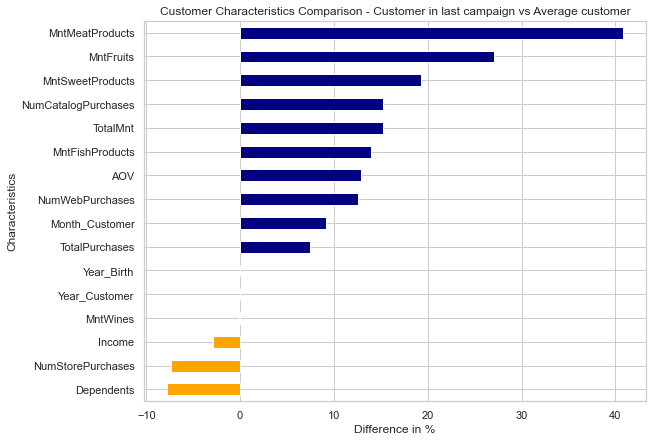

In [87]:
plt.figure(figsize = (9, 7))
value1 = pd.DataFrame((((cp_last_n.mean()) - df2.mean()) / df2.mean())*100)
value1.dropna(inplace = True)
value1.sort_values(by=0,inplace = True)
value1['positive'] = value1[0] >=0
value1[0].plot(kind='barh', color=value1.positive.map({True: 'navy', False: 'orange'}))
plt.title("Customer Characteristics Comparison - Customer in last campaign vs Average customer")
plt.xlabel("Difference in %")
plt.ylabel("Characteristics")

In [88]:
cp__the_rest_n.mean()

Year_Birth              1966.956204
Income                 63439.063869
Dependents                 0.740876
Year_Customer           2013.197080
Month_Customer             6.131387
MntWines                 579.251825
MntFruits                 32.576642
MntMeatProducts          255.419708
MntFishProducts           52.040146
MntSweetProducts          37.518248
NumWebPurchases            5.054745
NumCatalogPurchases        4.029197
NumStorePurchases          7.248175
TotalMnt                1015.218978
TotalPurchases            18.412409
AOV                       56.958413
dtype: float64

Text(0, 0.5, 'Characteristics')

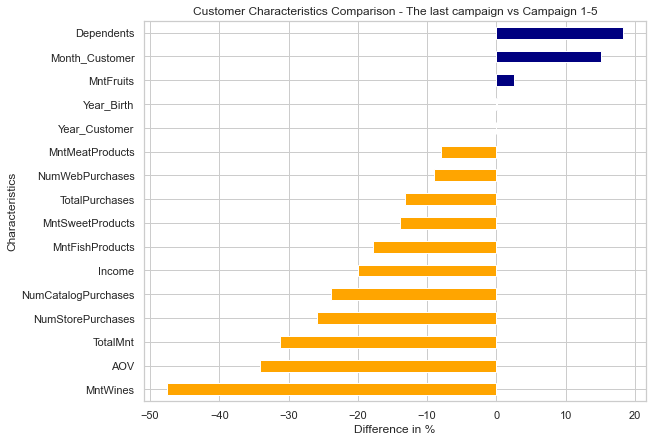

In [89]:
# visualize the differences
plt.figure(figsize = (9, 7))
value = pd.DataFrame((((cp_last_n.mean()) - cp__the_rest_n.mean()) / cp__the_rest_n.mean())*100)
value.dropna(inplace = True)
value.sort_values(by=0,inplace = True)
value['positive'] = value[0] >=0
value[0].plot(kind='barh', color=value.positive.map({True: 'navy', False: 'orange'}))
plt.title("Customer Characteristics Comparison - The last campaign vs Campaign 1-5")
plt.xlabel("Difference in %")
plt.ylabel("Characteristics")

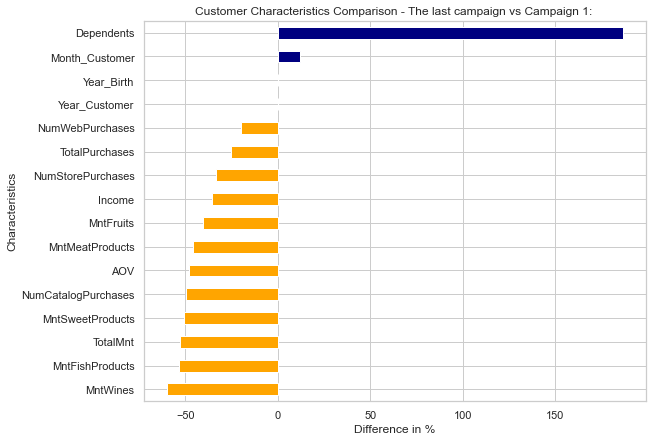

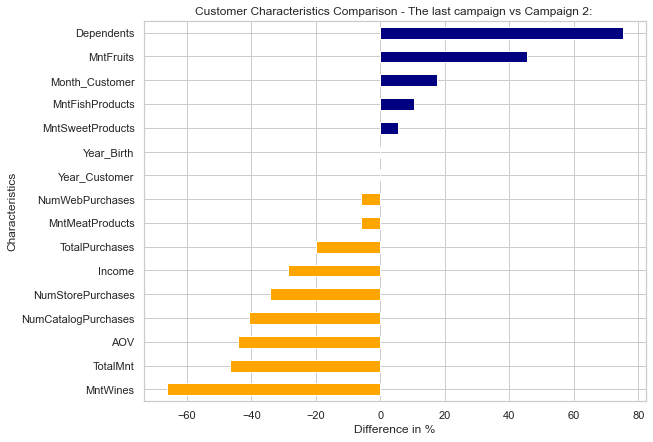

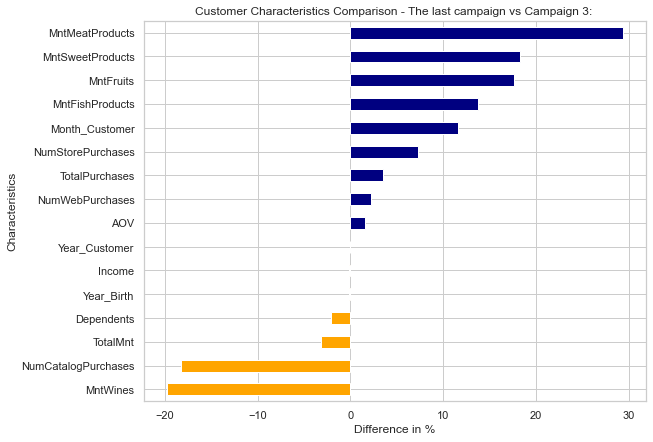

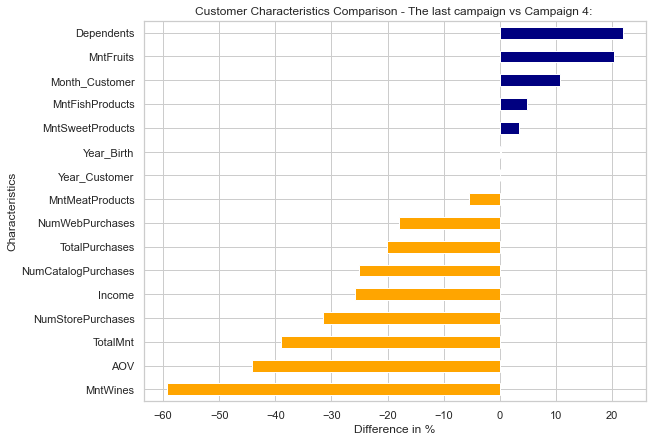

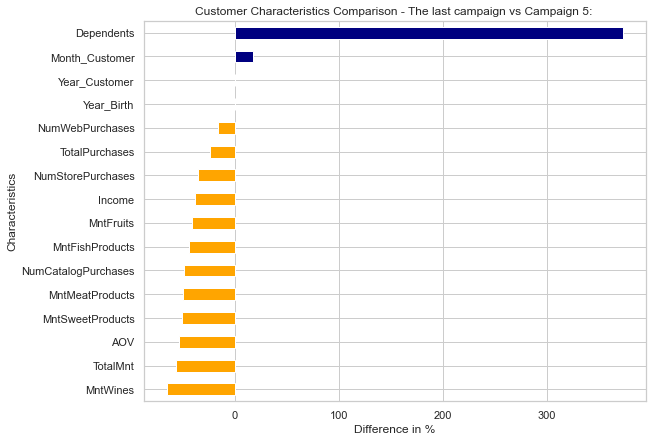

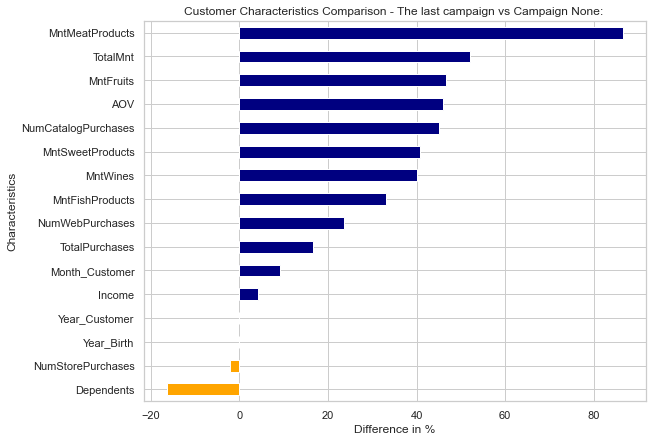

In [148]:
compare_cols = [cp_1, cp_2, cp_3, cp_4, cp_5, cp_none]
q=0

for col in compare_cols:
    q = q + 1
    if q == 6:
        q = 'None'
    plt.figure(figsize = (9, 7))
    value = pd.DataFrame((((cp_last_n.mean()) - col.mean()) / col.mean())*100)
    value.dropna(inplace = True)
    value.sort_values(by=0,inplace = True)
    value['positive'] = value[0] >=0
    value[0].plot(kind='barh', color=value.positive.map({True: 'navy', False: 'orange'}))
    plt.title("Customer Characteristics Comparison - The last campaign vs Campaign " + str(q) + ": ")
    plt.xlabel("Difference in %")
    plt.ylabel("Characteristics")

In [90]:
cp_last_country = pd.DataFrame((cp_last_n.Country.value_counts()/cp_last_n.shape[0])*100)
cp_last_country.rename(columns={'Country':'Percent'}, inplace=True)
cp_last_country['country'] = cp_last_country.index
cp_last_country = cp_last_country.sort_values('country')
cp_last_country.drop(['country'], axis=1, inplace=True)
cp_last_country

Percent
AUS   6.164384
CA   10.273973
GER   4.109589
IND   4.109589
ME    0.684932
SA   17.808219
SP   52.054795
US    4.794521

In [117]:
cp__the_rest2_country = pd.DataFrame((cp__the_rest_n.Country.value_counts()/cp__the_rest_n.shape[0])*100)
cp__the_rest2_country.rename(columns={'Country':'Percent'}, inplace=True)
cp__the_rest2_country['country'] = cp__the_rest2_country.index
cp__the_rest2_country = cp__the_rest2_country.sort_values('country')
cp__the_rest2_country.drop(['country'], axis=1, inplace=True)

new_row = pd.DataFrame({'Percent': [0]}, index=['ME'])

# Append the new row to the existing DataFrame
cp__the_rest2_country = cp__the_rest2_country.append(new_row)

# Sort the DataFrame by the index (country codes) if needed
cp__the_rest2_country = cp__the_rest2_country.sort_index()

cp__the_rest2_country

Percent
AUS   3.284672
CA   12.043796
GER   6.204380
IND   8.029197
ME    0.000000
SA   13.503650
SP   51.459854
US    5.474453

Text(0, 0.5, 'Country')

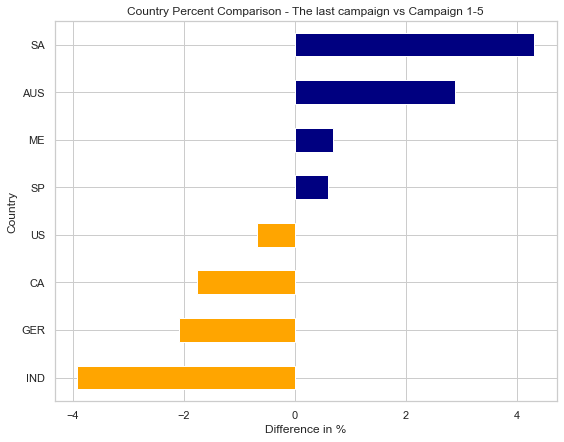

In [118]:
country_final = cp_last_country-cp__the_rest2_country

# visualize the differences
plt.figure(figsize = (9, 7))
country_final.sort_values(by="Percent",inplace = True)
country_final['positive'] = country_final["Percent"] >=0
country_final["Percent"].plot(kind='barh', color=country_final.positive.map({True: 'navy', False: 'orange'}))
plt.title("Country Percent Comparison - The last campaign vs Campaign 1-5")
plt.xlabel("Difference in %")
plt.ylabel("Country")

In [95]:
df['Income'].mean()

52227.40768886902

In [96]:
df['Income'].std()

25043.26682984504

In [ ]:
cp_last_n['Cat_Income'] = 

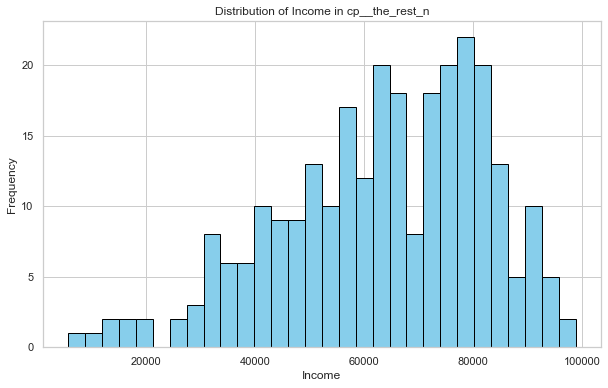

In [94]:
# Plot the distribution of the 'Income' column
plt.figure(figsize=(10, 6))
plt.hist(cp__the_rest_n['Income'], bins=30, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title("Distribution of Income in cp__the_rest_n")
plt.xlabel("Income")
plt.ylabel("Frequency")

# Show the plot
plt.show()


In [100]:
quantiles = df['Income'].quantile([0.25, 0.5, 0.75])
quantiles

0.25    35523.0
0.50    51381.5
0.75    68281.0
Name: Income, dtype: float64

In [102]:
# Create categories based on quantiles
cp_last_n['Cat_Income'] = pd.qcut(df['Income'], 
                                  q=[0, 0.25, 0.75, 1], 
                                  labels=['Low', 'Medium', 'High'])

# Display the updated DataFrame
print(cp_last_n[['Income', 'Cat_Income']].head())


     Income Cat_Income
0   84835.0       High
5   71691.0       High
12  67786.0     Medium
16  54809.0     Medium
40  21359.0        Low


In [103]:
# Create categories based on quantiles
cp__the_rest_n['Cat_Income'] = pd.qcut(df['Income'], 
                                  q=[0, 0.25, 0.75, 1], 
                                  labels=['Low', 'Medium', 'High'])

# Display the updated DataFrame
print(cp__the_rest_n[['Income', 'Cat_Income']].head())

      Income Cat_Income
41   66465.0     Medium
71   81975.0       High
105  62845.0     Medium
110  53863.0     Medium
114  37368.0     Medium


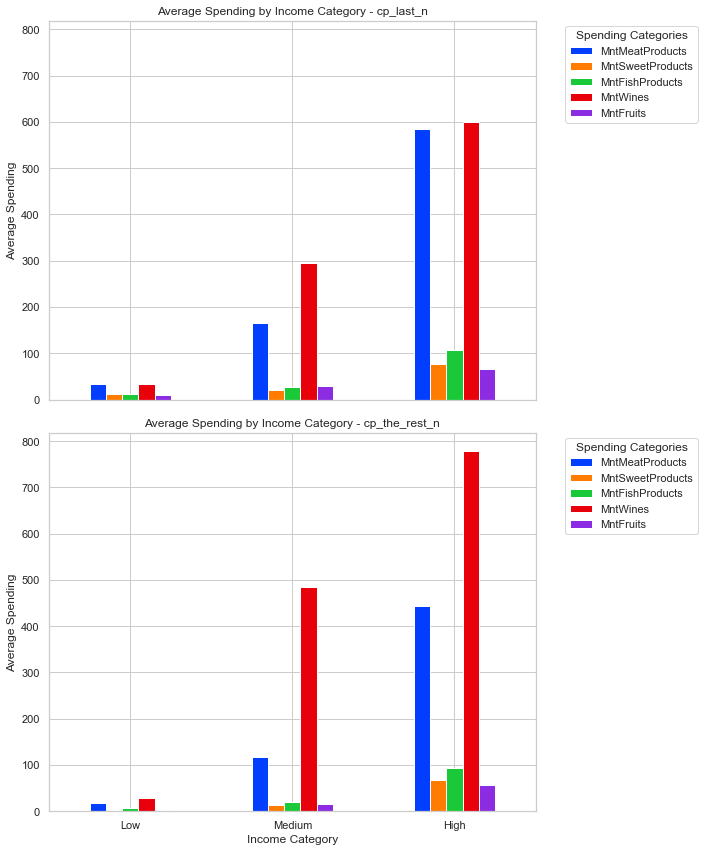

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns related to spending
spending_columns = ['MntMeatProducts', 'MntSweetProducts', 'MntFishProducts', 'MntWines', 'MntFruits']  # Replace with your actual column names

# Calculate the average spending by income category for both datasets
avg_spending_last_n = cp_last_n.groupby('Cat_Income')[spending_columns].mean()
avg_spending_rest_n = cp__the_rest_n.groupby('Cat_Income')[spending_columns].mean()

# Set a color palette with distinct colors
colors = sns.color_palette("bright", len(spending_columns))

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True, sharey=True)

# Plot for cp_last_n
avg_spending_last_n.plot(kind='bar', ax=axs[0], color=colors)
axs[0].set_title('Average Spending by Income Category - cp_last_n')
axs[0].set_xlabel('Income Category')
axs[0].set_ylabel('Average Spending')
axs[0].set_xticklabels(avg_spending_last_n.index, rotation=0)
axs[0].legend(title='Spending Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot for cp_the_rest_n
avg_spending_rest_n.plot(kind='bar', ax=axs[1], color=colors)
axs[1].set_title('Average Spending by Income Category - cp_the_rest_n')
axs[1].set_xlabel('Income Category')
axs[1].set_ylabel('Average Spending')
axs[1].set_xticklabels(avg_spending_rest_n.index, rotation=0)
axs[1].legend(title='Spending Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


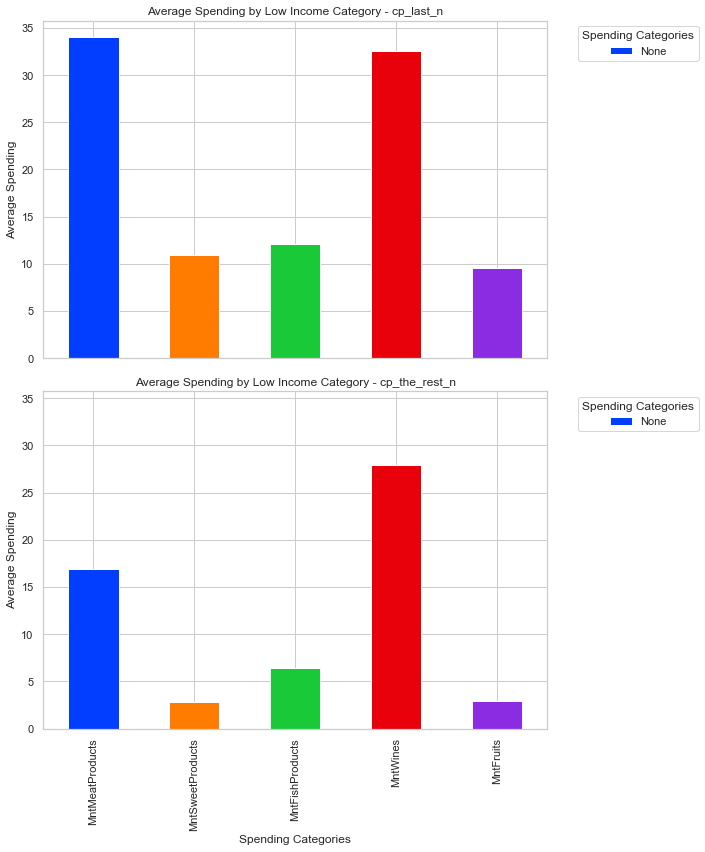

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns related to spending
spending_columns = ['MntMeatProducts', 'MntSweetProducts', 'MntFishProducts', 'MntWines', 'MntFruits']  # Replace with your actual column names

# Filter the data for the "Low" income category
cp_last_n_low = cp_last_n[cp_last_n['Cat_Income'] == 'Low']
cp_the_rest_n_low = cp__the_rest_n[cp__the_rest_n['Cat_Income'] == 'Low']

# Calculate the average spending for the "Low" income category in both datasets
avg_spending_last_n_low = cp_last_n_low[spending_columns].mean()
avg_spending_rest_n_low = cp_the_rest_n_low[spending_columns].mean()

# Set a color palette with distinct colors
colors = sns.color_palette("bright", len(spending_columns))

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True, sharey=True)

# Plot for cp_last_n (Low income)
avg_spending_last_n_low.plot(kind='bar', ax=axs[0], color=colors)
axs[0].set_title('Average Spending by Low Income Category - cp_last_n')
axs[0].set_xlabel('Spending Categories')
axs[0].set_ylabel('Average Spending')
axs[0].legend(title='Spending Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot for cp_the_rest_n (Low income)
avg_spending_rest_n_low.plot(kind='bar', ax=axs[1], color=colors)
axs[1].set_title('Average Spending by Low Income Category - cp_the_rest_n')
axs[1].set_xlabel('Spending Categories')
axs[1].set_ylabel('Average Spending')
axs[1].legend(title='Spending Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [116]:
cp__the_rest_n[cp__the_rest_n['Country']=="ME"]

Empty DataFrame
Columns: [Year_Birth, Income, Dependents, Country, Year_Customer, Month_Customer, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, TotalMnt, TotalPurchases, AOV, Cat_Income]
Index: []

# Conclusion

## Summaries

- The last campaign had twice the amount of engagement than the previous campaigns.
    - The last campaign attracted more customers who had lower income and more dependents compared to the customers who were attracted by most of the previous campaigns.
    - The last campaign had fewer customers purchase from all the purchasing channels than most of the previous campaigns.
    - The products on which customers spend the most are Wine and Meat, but last campaign customers spent 10% less on meat and 50% less on wine compared to the previous campaigns.
    - The last campaign customers purchased more fruits and sweets compared to half of the previous campaigns.
    - Compared to customers who made no purchases in previous campaigns, those who purchased in the last campaign bought more products across all categories and had 5% higher income.

- Overall, the last campaign effectively targeted low-income customers with more dependents and saw the highest (60%) acceptance in Mexico. However, it performed worse with high-spending products like Wine and Meat compared to previous campaigns.
    
    
- Most customers purchase through physical stores, where people tend to spend more amount per purchase. The reason might be the customers had more impulsive purchases when they saw other similar products in stores.


- People with kids:
    - tend to purchase less
    - tend to have a high number of purchases made with a discount
    
   
- Advertising campaign acceptance is positively correlated with income and negatively correlated with having kids/teens
  
 
## Recommendations for Customer Acquisition and Increasing Revenue:

### On Acquisition:

##### Expand Campaigns with Localized Strategies: 
- Continue the same campaign model for low-income population and leverage the success in Mexico by implementing localized marketing strategies in other regions with similar demographics.

##### Targeted Promotions for Families
- Since families with children tend to purchase less and focus on discounted products, consider offering exclusive discounts on family-oriented products or bulk-buying options that offer value.

### On Increasing revenue:

##### Focus on Wine and Meat
- Introduce targeted promotions or loyalty rewards to previous high-spending customers.

##### Cross-sell and Bundle
- Bundle wine and meat with other products like fruits and sweets to drive sales across categories especially in low-income demographics.

##### Optimize Customer Segmentation for Higher Spending
- Use data-driven segmentation to create personalized offers for high-income and high-spending customers, encouraging them to increase their spending in premium categories like wine and meat.

##### Change marketing strategy for worse performing countries
- For countries like India where the latest campaign performed poorly, implement previous strategies and optimize them in accordance with their demographics.

##### Exclusive In-Store Discounts
- Offer exclusive in-store discounts or promotions to drive foot traffic and capitalize on impulsive purchasing behavior resulting in higher Average Order Volume (AOV).

